In [1]:
import pandas as pd

In [2]:
from milestone1.question1 import get_play_by_play_season_gameType

match_type = 2

get_play_by_play_season_gameType("2015","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2016","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2017","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2018","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2019","0"+str(match_type),"data_saved/play_by_play")

100%|███████████████████████████████████████| 1271/1271 [03:08<00:00,  6.74it/s]


In [1]:
from milestone1.question4 import *
from utils import *

#les donnes des saisons régulière seulement!
directory2015 = r'data_saved/play_by_play/2015/regular'
directory2016 = r'data_saved/play_by_play/2016/regular'
directory2017 = r'data_saved/play_by_play/2017/regular'
directory2018 = r'data_saved/play_by_play/2018/regular'
directory2019 = r'data_saved/play_by_play/2019/regular'


dir = get_current_dir()
df2015 = create_full_df(directory=directory2015, parent_dir=dir)
df2016 = create_full_df(directory=directory2016, parent_dir=dir)
df2017 = create_full_df(directory=directory2017, parent_dir=dir)
df2018 = create_full_df(directory=directory2018, parent_dir=dir)

# 2019/20 comme l' ensemble final des données test.
df2019 = create_full_df(directory=directory2019, parent_dir=dir)

In [2]:
df15_16 = pd.concat([df2015, df2016], ignore_index=True)
df17_18 = pd.concat([df2017, df2018], ignore_index=True)

#utilise les données 2015/16 - 2018/19 de la saison régulière pour créer vos ensembles d'entraînement et de validation.
df_train_val =  pd.concat([df15_16, df17_18], ignore_index=True).sample(frac=1)

In [3]:
df_train_val.head()

,Game_ID,Event_ID,Period_Number,Period_Time,Game_Time,Secondes_jeu,Shot_or_Goal,Shot_Type,Shooter,Team_of_Shooter,...,Est_un_but,Filet_vide,Last_event_type,Rebond,X_last_event,Y_last_event,Sec_from_lastEvent,Dis_from_lastEvent,Angle_change,Vitesse
133287,2016020979,219,3,02:18,42.30,2538.0,Shot,Snap Shot,Drake Caggiula,EDM,...,0,0,Blocked Shot,False,-60.0,-2.0,11.4,126.491106,0.000000,11.095711
4004,2015020489,94,1,17:32,17.53,1051.8,Shot,Wrist Shot,Jamie Benn,DAL,...,0,0,Shot,True,-60.0,-1.0,4.2,20.396078,28.474204,4.856209
49839,2015020930,114,1,17:45,17.75,1065.0,Shot,Wrist Shot,Mike Richards,WSH,...,0,0,Hit,False,-63.0,-39.0,5.4,135.247921,0.000000,25.045911
219430,2017020531,66,1,09:54,9.90,594.0,Goal,Wrist Shot,Ondrej Kase,ANA,...,1,0,Blocked Shot,False,60.0,3.0,6.0,138.000000,0.000000,23.000000
287784,2018020048,97,1,15:03,15.05,903.0,Shot,Backhand,Taylor Hall,NJD,...,0,0,Hit,False,10.0,38.0,8.4,81.939002,0.000000,9.754643


In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df_train_val[[ "Angle", 'Distance']]
Y = df_train_val[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)


0.9057338263558934


        Est_un_but
118318           0
123050           0
58421            0
61664            0
276933           0
...            ...
65956            1
23221            0
214893           1
17122            0
35746            1

[102497 rows x 1 columns]


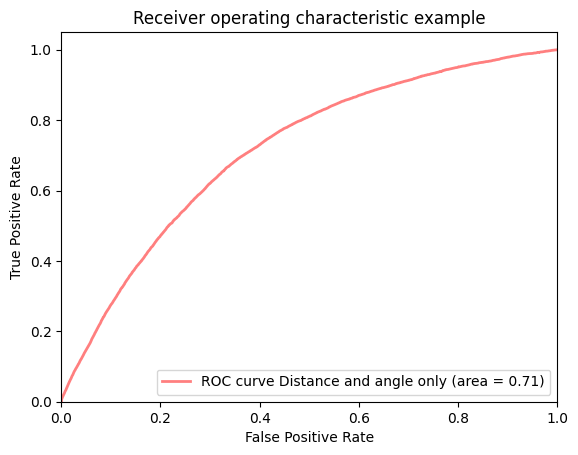

[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1]
[92.10037589073181, 25.891119241714478, 24.06262457370758, 22.749778628349304, 22.269053757190704, 21.6559961438179, 21.37390524148941, 20.986244082450867, 20.748719573020935, 20.371010899543762, 20.002810657024384, 19.80874538421631, 19.532740116119385, 18.901899456977844, 18.746565282344818, 18.249979615211487, 17.786675691604614, 17.440152168273926, 17.03004688024521, 16.620001196861267, 16.04141741991043, 15.676930546760559, 15.34651666879654, 15.10874480009079, 14.671288430690765, 14.370018243789673, 13.95207720994947, 13.661852478981018, 13.415171205997467, 13.029925525188446, 12.

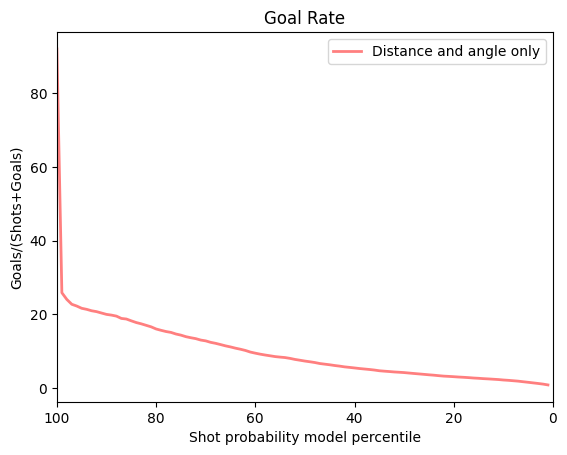

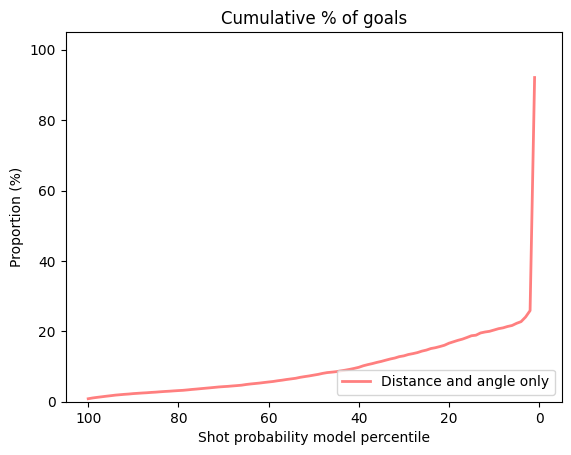

(102497, 2)


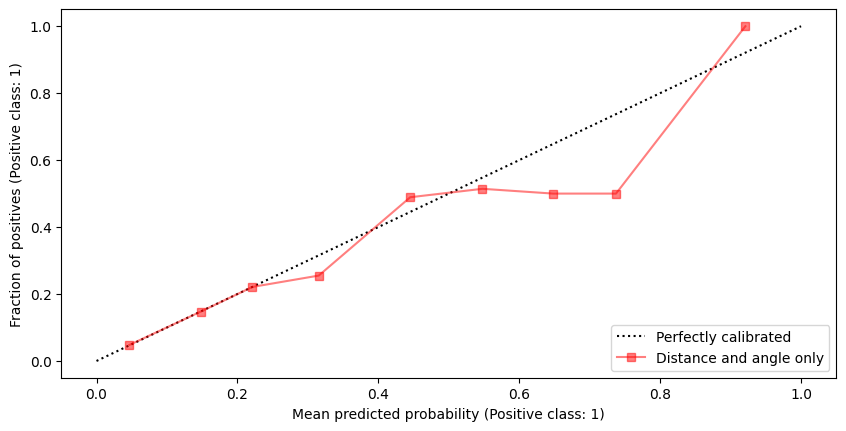

In [6]:
from utils import *

create_plots(X_test, y_test.to_numpy(), y_pred, 'Distance and angle only')


In [4]:
from utils import *

df_train_val["Game_Time"] = (df_train_val["Game_Time"]*60).apply(lambda x: int(x))
df_train_val["Change_ID"] = [False]+[df_train_val["Game_ID"][i] == df_train_val["Game_ID"][i-1] for i in range(1, len(df_train_val))]
col = list()
df_train_val['goal']=df_train_val.Shot_or_Goal.astype('category')
goal_mode = df_train_val.goal.mode().iloc[0]
for i in range(len(df_train_val.Shot_or_Goal)):
    if df_train_val.Change_ID[i] and i-1 >= 0:
        col += [df_train_val.goal[i-1]]
    else:
        col += [np.nan] 

df_train_val["Pre_type"] = col
#df_train_val["Pre_type"] = df_train_val["Pre_type"].astype('category')
print(df_train_val["Pre_type"])
col = list()
for i in range(len(df_train_val)):
    if df_train_val.Change_ID[i] and i-1 >= 0:
        col += [df_train_val.X_Coordinate[i-1]]
    else:
        col += [np.nan] 

df_train_val["Pre_X"] = col
col = list()
for i in range(len(df_train_val)):
    if df_train_val.Change_ID[i] and i-1 >= 0:
        col += [df_train_val.Y_Coordinate[i-1]]
    else:
        col += [np.nan] 

df_train_val["Pre_Y"] = col
df_train_val["Time_Since_LastEvnt"] = abs(df_train_val["Game_Time"].diff())
for i in range(len(df_train_val)):
    if df_train_val.Change_ID[i]:
        continue
    else:
        df_train_val.at[i, "Time_Since_LastEvnt"] = np.nan
col = list()
for i in range(len(df_train_val)):
    if df_train_val.Change_ID[i]:
        col += [abs(np.linalg.norm(np.array([df_train_val.X_Coordinate[i], df_train_val.Y_Coordinate[i]]) - np.array([df_train_val.Pre_X[i], df_train_val.Pre_Y[i]])))]
    else:
        col += [np.nan] 

df_train_val["Dist_from_LastEvnt"] = col
df_train_val["Rebond"] = [df_train_val.Shot_or_Goal[i] == df_train_val.Pre_type[i] for i in range(len(df_train_val))]
df_train_val["Changement_d'angle_de_tir"] = [int(df_train_val.Rebond[i]) for i in range(len(df_train_val))]
df_train_val["Vitesse"] = df_train_val.Dist_from_LastEvnt/df_train_val.Time_Since_LastEvnt


print(df_train_val.columns)


195073     NaN
239266    Shot
278332    Shot
82748     Shot
18730     Shot
          ... 
67454     Shot
119984    Shot
25625     Shot
190595    Shot
153030    Goal
Name: Pre_type, Length: 310596, dtype: object
Index(['Game_ID', 'Event_ID', 'Period_Number', 'Period_Time', 'Game_Time',
       'Shot_or_Goal', 'Shot_Type', 'Shooter', 'Team_of_Shooter', 'Goalie',
       'Empty_Net', 'Goal_Strength', 'X_Coordinate', 'Y_Coordinate',
       'Distance', 'Angle', 'Est_un_but', 'Filet_vide', 'Change_ID', 'goal',
       'Pre_type', 'Pre_X', 'Pre_Y', 'Time_Since_LastEvnt',
       'Dist_from_LastEvnt', 'Rebond', 'Changement_d'angle_de_tir', 'Vitesse'],
      dtype='object')


Secondes_jeu           float64
Period_Number            int64
X_Coordinate           float64
Y_Coordinate           float64
Distance               float64
Angle                  float64
Shot_Type             category
Last_event_type       category
X_last_event           float64
Y_last_event           float64
Sec_from_lastEvent     float64
Dis_from_lastEvent     float64
Rebond                category
Angle_change           float64
Vitesse                float64
dtype: object
0.9078021795759876
[0.19732228 0.02672365 0.03932961 ... 0.16687152 0.10773031 0.03300332]
(102497, 1)


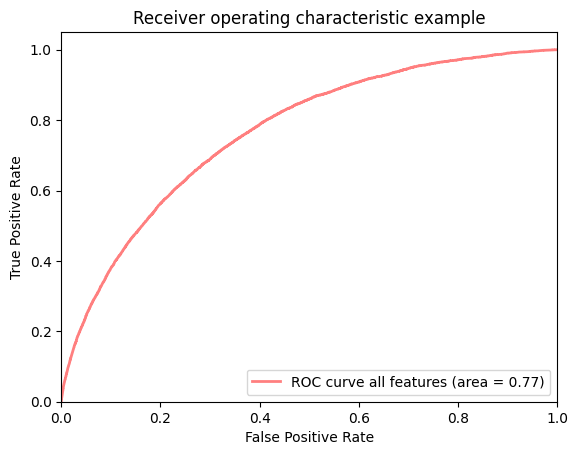

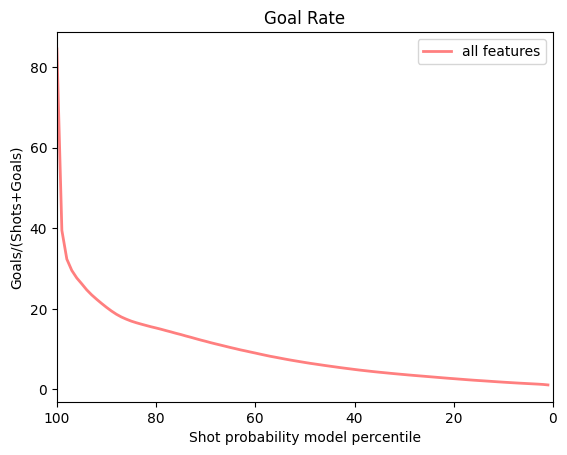

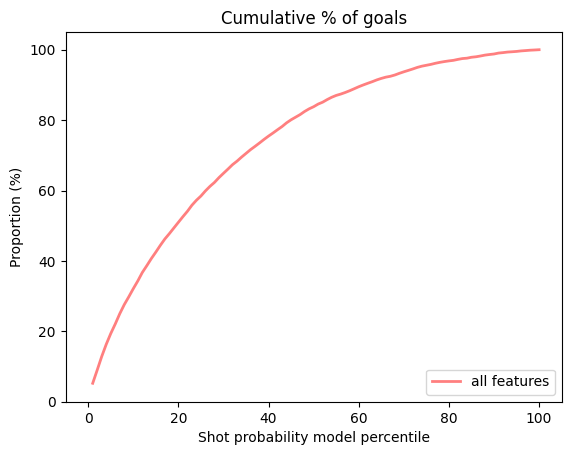

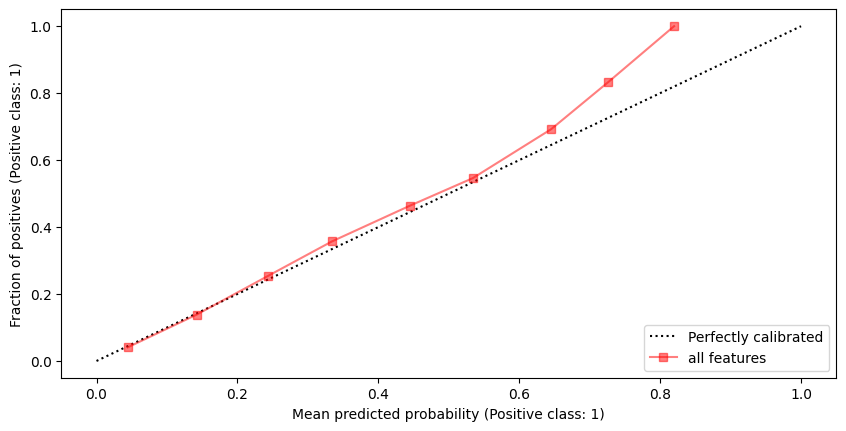

In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *

df_train_val_params = df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse', 'Est_un_but']]
#df_train_val_params = df_train_val[["Game_Time","Period_Number", "X_Coordinate", "Y_Coordinate", "Distance", "Angle", "Rebond", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_type", "Pre_Y", "Dist_from_LastEvnt", "Est_un_but"]]
df_train_val_params = df_train_val_params.copy()
df_train_val_params = replace_nans(df_train_val_params)
df_train_val_params = replace_infs(df_train_val_params)
df_train_val_params["Rebond"]=df_train_val_params["Rebond"].astype("category")
df_train_val_params["Last_event_type"]=df_train_val_params["Last_event_type"].astype("category")
df_train_val_params["Shot_Type"]=df_train_val_params["Shot_Type"].astype("category")

X = df_train_val_params[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse']]
#X = df_train_val_params[["Game_Time","Period_Number",  "X_Coordinate", "Rebond", "Pre_type", "Y_Coordinate", "Distance", "Angle", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_Y", "Dist_from_LastEvnt"]]
Y = df_train_val_params[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
#model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 1, max_depth= 5, gamma= 5, colsample_bytree= 0.8, eval_metric='auc', disable_default_eval_metric=True)
model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 15, max_depth= 6, gamma= 8, colsample_bytree= 0.9, eval_metric='auc', disable_default_eval_metric=True)

print(X_train.dtypes)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

#ytest = y_test['Est_un_but']
print(y_pred)
print(y_test.shape)

create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'all features')

In [9]:
from utils import *

print(grid_search(X, Y["Est_un_but"], model))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'tree_method': 'hist', 'subsample': 1.0, 'min_child_weight': 15, 'max_depth': 6, 'gamma': 8, 'colsample_bytree': 0.9}


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teylouniseifu/ift-6758-a22/ddaa954bd700414fb455966d39ef6479
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (513.90 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/teylouniseifu/ift-6758-a22/a3bffd82dc5143e39b3aa6eef8bf41a3



Secondes_jeu          float64
Period_Number           int64
X_Coordinate          float64
Y_Coordinate          float64
Distance              float64
Angle                 float64
X_last_event          float64
Y_last_event          float64
Sec_from_lastEvent    float64
Dis_from_lastEvent    float64
Angle_change          float64
Vitesse               float64
dtype: object
0.9065826316867811


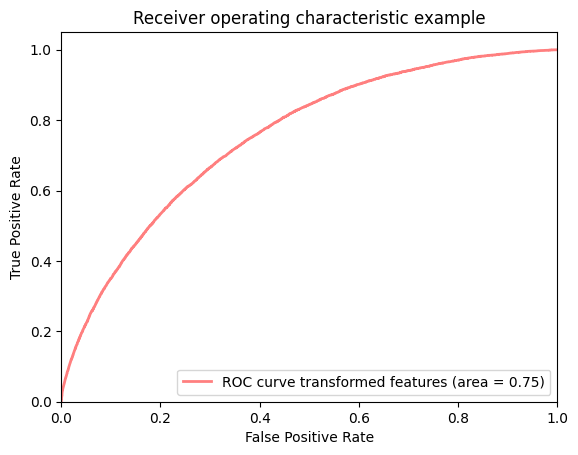

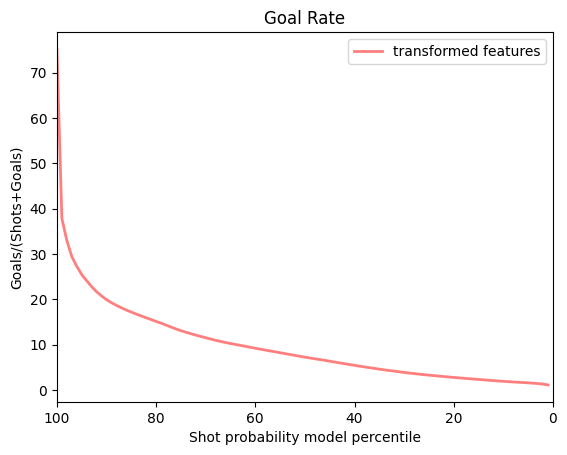

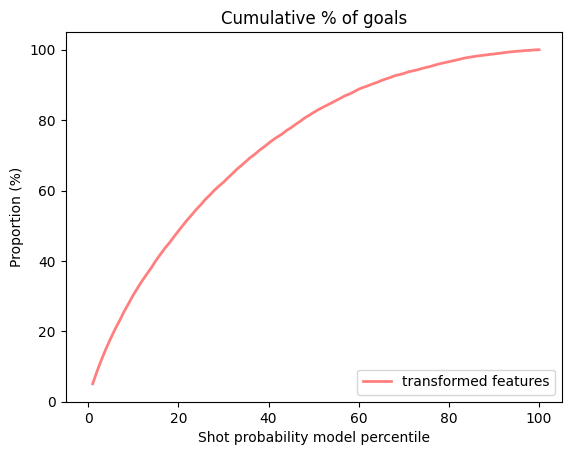

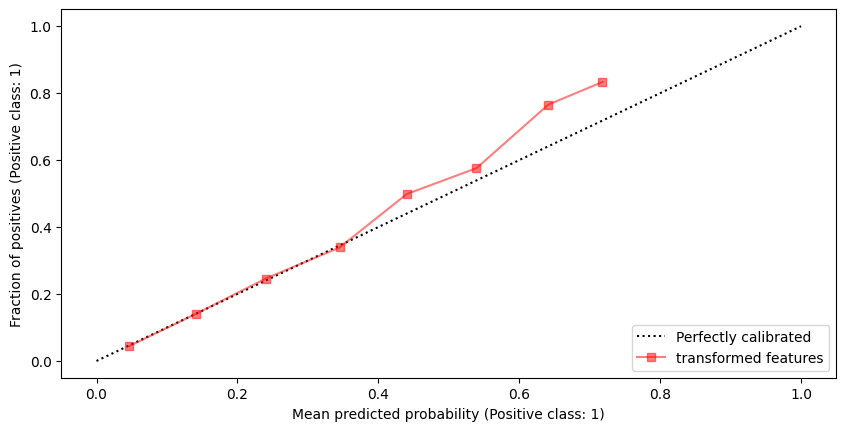

In [63]:
import ray
import comet_ml
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif, chi2,  mutual_info_classif, mutual_info_regression, chi2, r_regression, f_classif, f_regression
from utils import *
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from ray.air.callbacks.comet import CometLoggerCallback

experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question5', 'features_transformed'])

fs = SelectKBest(score_func=f_regression, k=8)
W=df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Angle_change','Vitesse']].copy()
W = replace_nans(W)
W = replace_infs(W)
print(W.dtypes)
Y = df_train_val[["Est_un_but"]]
W = pd.DataFrame(fs.fit_transform(W, Y["Est_un_but"]))
#W["Rebond"]=df_train_val["Rebond"].astype("category")
#W["Last_event_type"]=df_train_val["Last_event_type"].astype("category")
#W["Shot_Type"]=df_train_val["Shot_Type"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(W, Y["Est_un_but"], test_size=0.33, random_state=10)
model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 0.9, min_child_weight= 5, max_depth= 8, gamma= 5, colsample_bytree= 0.7, eval_metric='auc', disable_default_eval_metric=True)
#model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 15, max_depth= 6, gamma= 8, colsample_bytree= 0.9, eval_metric='auc', disable_default_eval_metric=True)

model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

experiment.set_model_graph(model)

create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'transformed features')

In [51]:
from utils import *

print(grid_search(W, Y["Est_un_but"], model))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'tree_method': 'hist', 'subsample': 0.9, 'min_child_weight': 5, 'max_depth': 8, 'gamma': 5, 'colsample_bytree': 0.7}


In [ ]:
from comet_ml import Experiment

experiment = Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu",
)
experiment.log_dataframe_profile(
    df_train_val.loc[df_train_val.Game_ID == 2017021065],
    name='wpg_v_wsh_2017021065', # keep this name
    dataframe_format='csv' # ensure you set this flag!
)